In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pandas as pd
import seaborn as sns
import glob
import cv2
import re
import os
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
names=os.listdir('./detected_img/')#it will get on the images names from a directory
string = ''.join(names)
result=re.findall(r'(\d)_\d*_',string)
face = list(map(int, result))
len(face)

197

In [3]:
#Here I have a about 200 images in the below folder 'train' glob will get all the images from folder here
path = glob.glob('./detected_img/*.jpeg')
image=[]
for img in path:
    v = cv.imread(img) #It will loads all the images from a file
    blur = cv.GaussianBlur(v,(5,5),0)
    gray = cv.cvtColor(blur,cv.COLOR_BGR2GRAY)# here changing  color image to gray scale
    image.append(gray)

In [4]:
pic = []
for i in image:
    #v = cv.imread(img)
    #gray = cv.cvtColor(i,cv.COLOR_BGR2GRAY)# here changing  color image to gray scale
    gray = cv2.resize(i,(64,64))
    pic.append(gray)

In [5]:
from numpy import linalg as la

evals, evecs = np.linalg.eig(gray) #creating eigen values and eigen vectors
sort_indices =np.argsort(gray)[::-1] # index sorting & inversing [::-1]
x_v1,y_v1 = evecs[:, sort_indices[0]]  # Eigenvector with largest eigenvalue
x_v2,y_v2 = evecs[:, sort_indices[1]]  # Eigenvector with lowest eigenvalue



ValueError: too many values to unpack (expected 2)

In [6]:
x = []
for i in pic:
    x.append(i.reshape(4096))


In [7]:
x = np.array(x)

x_norm = x/x.max()
df = pd.DataFrame(x_norm)
df['y'] = face
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,y
0,0.176471,0.337255,0.345098,0.345098,0.345098,0.345098,0.341176,0.345098,0.321569,0.278431,...,0.364706,0.372549,0.368627,0.450980,0.501961,0.501961,0.435294,0.533333,0.462745,1
1,0.145098,0.207843,0.254902,0.262745,0.258824,0.258824,0.254902,0.239216,0.200000,0.168627,...,0.227451,0.149020,0.101961,0.078431,0.062745,0.066667,0.082353,0.098039,0.105882,0
2,0.117647,0.105882,0.101961,0.098039,0.098039,0.098039,0.098039,0.094118,0.098039,0.098039,...,0.086275,0.086275,0.086275,0.094118,0.105882,0.105882,0.101961,0.094118,0.098039,0
3,0.121569,0.121569,0.117647,0.117647,0.117647,0.121569,0.129412,0.133333,0.137255,0.129412,...,0.074510,0.070588,0.074510,0.086275,0.101961,0.121569,0.149020,0.164706,0.160784,0
4,0.113725,0.105882,0.105882,0.105882,0.105882,0.101961,0.101961,0.109804,0.137255,0.164706,...,0.125490,0.101961,0.070588,0.070588,0.066667,0.082353,0.105882,0.098039,0.094118,1


In [8]:
x = df.drop(columns='y', axis = 1)
y = df['y']
x.shape

(197, 4096)

In [9]:
x = np.array(x)
type(x)

numpy.ndarray

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA()

In [12]:
x_pca = pca.fit_transform(x.T)

In [13]:
x_pca.T.shape


(197, 4096)

In [14]:
var_per = pca.explained_variance_ratio_

In [15]:
cum = [0]
for i in range(len(var_per)):
    cum.append(cum[-1]+var_per[i])

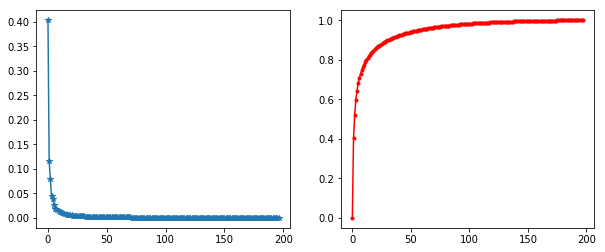

In [16]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(var_per,'*-')
plt.subplot(1,2,2)
plt.plot(cum,'r.-')
plt.show()

In [17]:
pca = PCA(.87)

In [18]:
x_pca = pca.fit_transform(x_pca.T)

In [19]:
x_pca.shape

(197, 23)

In [20]:
y.shape

(197,)

In [21]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_pca,y , test_size=.2 )
x_train.shape  , y_train.shape

((157, 23), (157,))

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression()
model.fit(x_train,y_train)

/home/praveen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
y_pred = model.predict(x_train)
y_pred.shape , y_train.shape

((157,), (157,))

In [25]:
from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(y_train,y_pred)
print(cm)

Predicted  False  True  __all__
Actual                         
False          5    58       63
True           1    64       65
__all__        6   122      128


In [26]:
y_hat_test = model.predict(x_test)
cm1 = ConfusionMatrix(y_test,y_hat_test)
print(cm1)

Predicted  False  True  __all__
Actual                         
False          0     0        0
True           0     0        0
__all__        0     0        0


In [27]:
cm.stats_overall

/home/praveen/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


OrderedDict([('Accuracy', 0.5390625),
             ('95% CI', (0.4487739983990822, 0.6275026021148515)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 0.9999999999999999),
             ('Kappa', 0.06488360574541853),
             ("Mcnemar's Test P-Value", 'ToDo')])

In [28]:
cm1.stats_overall

/home/praveen/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:51: RuntimeWarning: invalid value encountered in double_scalars
  p0 = np.float64(np.diag(df.iloc[0:m, 0:m]).sum()) / n
/home/praveen/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:52: RuntimeWarning: invalid value encountered in double_scalars
  pc = np.float64((ni.iloc[0:m] * nj.iloc[0:m]).sum()) / (n**2)
/home/praveen/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:56: RuntimeWarning: invalid value encountered in double_scalars
  rand = np.float64(1) + ((df**2).sum().sum() - ((ni**2).sum() + (nj**2).sum()) / 2) / n2
/home/praveen/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
/home/praveen/a

OrderedDict([('Accuracy', nan),
             ('95% CI', (nan, nan)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', nan),
             ('Kappa', nan),
             ("Mcnemar's Test P-Value", 'ToDo')])

# Desison Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
y_de = model1.predict(x_train)
y_pred.shape , y_train.shape

((157,), (157,))

In [31]:
from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(y_train,y_de)
print(cm)

Predicted  False  True  __all__
Actual                         
False         29    34       63
True          33    32       65
__all__       62    66      128


In [32]:
cm.stats_overall

/home/praveen/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


OrderedDict([('Accuracy', 0.4765625),
             ('95% CI', (0.38758641495491014, 0.5666475097941697)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 0.8346633756453212),
             ('Kappa', -0.04738641914997557),
             ("Mcnemar's Test P-Value", 'ToDo')])

In [33]:
# face_cascade = cv2.CascadeClassifier('./xml/haarcascade_frontalface_default.xml')
# for i in  path:
#     img = cv2.imread(i)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# for (x, y, w, h) in faces:
#     cv2.rectangle(img, (x, y), (x + w, y + h), (255,0, 0), 2)
#     roi_color = img[y:y + h, x:x + w]
#     print("[INFO] Object found. Saving locally.")
#     cv2.imwrite('./detected images/'+str(w) + str(h) + '_faces.jpg', roi_color)

## female function

In [31]:

# def face_dec(ind,i):
#     face_cascade = cv2.CascadeClassifier('./xml/haarcascade_frontalface_default.xml')
#     img = cv2.imread(i)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    

#     for (x, y, w, h) in faces:
#         cv2.rectangle(img, (x, y), (x + w, y + h), (255,0, 0), 2)
#         roi_color = img[y:y + h, x:x + w]
#         print("[INFO] Object found. Saving locally.")
#         return cv2.imwrite('./detected female images/'+ str(ind)+str(w) + str(h) + '_faces.jpeg', roi_color)

In [32]:
# path = glob.glob('./female/*.jpeg')

# for ind,img in enumerate(path):
#     v = cv.imread(img)
#     face_dec(ind,img)

In [33]:

# def face_dec_male(ind,i):
#     face_cascade = cv2.CascadeClassifier('./xml/haarcascade_frontalface_default.xml')
#     img = cv2.imread(i)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    

#     for (x, y, w, h) in faces:
#         cv2.rectangle(img, (x, y), (x + w, y + h), (255,0, 0), 2)
#         roi_color = img[y:y + h, x:x + w]
#         print("[INFO] Object found. Saving locally.")
#         return cv2.imwrite('./detected male images/'+ str(ind)+str(w) + str(h) + '_faces.jpeg', roi_color)

In [34]:
# path = glob.glob('./male/*.jpeg')

# for ind,img in enumerate(path):
#     v = cv.imread(img)
#     face_dec_male(ind,img)

In [35]:
# # importing os module 
# import os 
  
# # Function to rename multiple files 

# i = 0

# for filename in os.listdir("./detected female images/"): 
#     dst ="0_" + str(i) + "_0.jpeg"
#     src ='./detected female images/'+ filename 
#     dst ='./detected female images/'+ dst 

#     # rename() function will 
#     # rename all the files 
#     os.rename(src, dst) 
#     i += 1

In [36]:
# # importing os module 
# import os 
  
# # Function to rename multiple files 

# i = 0

# for filename in os.listdir("./detected male images/"): 
#     dst ="1_" + str(i) + "_1.jpeg"
#     src ='./detected male images/'+ filename 
#     dst ='./detected male images/'+ dst 

#     # rename() function will 
#     # rename all the files 
#     os.rename(src, dst) 
#     i += 1

## resize of image 64,64

In [48]:
# path = glob.glob('./detected_img/*.jpeg')
# image=[]
# for img in path:
#     v = cv.imread(img)
#     gray = cv.cvtColor(v,cv.COLOR_BGR2GRAY)# here changing  color image to gray scale
#     gray = cv2.resize(gray,(64,64))
#     image.append(gray)
    